## XGBoost Modeling

https://xgboost.readthedocs.io/en/stable/python/python_intro.html

https://www.datacamp.com/tutorial/xgboost-in-python

https://www.kaggle.com/code/vinhnguyen/evolutionary-algorithms-for-param-tuning

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

import datetime
import math
import calendar

import xgboost as xgb
from xgboost import plot_importance

import random
from random import randint

In [3]:
df = pd.read_csv('EngineeredData.csv')

# Thanks for providing this in the forum
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

def rmspe_xg(yhat, y):
    y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe



In [5]:
features_x = ['HolidaysPerDayOfWeek',
 'CustomersPerDay',
 'HolidaysLastWeek',
 'CompetitionOpen',
 'SchoolHolidaysPerDayOfWeek',
 'DateDayOfYear',
 'DaysTillMaxPromo',
 'PromoPerDayOfWeek',
 'DateMonth',
 'HolidaysNextWeek',
 'StoreType',
 'PromoTomorrow',
 'PromoSince',
 '0_PromoInterval',
 'DateYear',
 'PromoYesterday',
 'Promo',
 'DayOfWeek',
 'Store',
 'DateDay',
 'Assortment',
 'SchoolHoliday',
 'Open',
 'DateWeek',
 'CompetitionDistance',
 'SalesPerDay',
 'SalesPerCustomersPerDay',
 'StateHoliday',
 'HolidaysThisWeek']

features_y = ['SalesLog']

In [6]:
#==============================================================Train Test Split
print("Train Test Split")

data = df.loc[(df['is_train']==1) & (df['Open']==1)& (df['Outlier']==False)]

x_train, x_test, y_train, y_test = train_test_split(data[features_x],
                                                    data[features_y],
                                                    test_size=0.1,
                                                    random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Train Test Split
(757442, 29) (757442, 1) (84161, 29) (84161, 1)


In [11]:
# ============================================================Train XGBoost model
dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)
evallist = [(dtrain, 'train'), (dtest, 'test')]

param = { 'objective': 'reg:squarederror',
         'max_depth': 9,
         'eta': 0.01,
         'subsample': 0.75,
         'colsample_bytree': 0.6
         }
num_trees = 300


In [12]:
print("Train XGBoost Model")

model = xgb.train(param, dtrain, num_trees, evals=evallist, 
                  feval=rmspe_xg, verbose_eval=True, early_stopping_rounds=50)

Train XGBoost Model
[0]	train-rmse:8.18186	train-rmspe:0.99986	test-rmse:8.17801	test-rmspe:0.99986
[1]	train-rmse:8.10010	train-rmspe:0.99984	test-rmse:8.09629	test-rmspe:0.99984
[2]	train-rmse:8.01915	train-rmspe:0.99981	test-rmse:8.01538	test-rmspe:0.99981
[3]	train-rmse:7.93912	train-rmspe:0.99978	test-rmse:7.93536	test-rmspe:0.99978
[4]	train-rmse:7.85979	train-rmspe:0.99975	test-rmse:7.85606	test-rmspe:0.99975
[5]	train-rmse:7.78125	train-rmspe:0.99971	test-rmse:7.77756	test-rmspe:0.99971
[6]	train-rmse:7.70359	train-rmspe:0.99968	test-rmse:7.69991	test-rmspe:0.99968
[7]	train-rmse:7.62671	train-rmspe:0.99964	test-rmse:7.62303	test-rmspe:0.99964
[8]	train-rmse:7.55059	train-rmspe:0.99960	test-rmse:7.54692	test-rmspe:0.99960
[9]	train-rmse:7.47515	train-rmspe:0.99955	test-rmse:7.47151	test-rmspe:0.99955
[10]	train-rmse:7.40046	train-rmspe:0.99950	test-rmse:7.39686	test-rmspe:0.99950
[11]	train-rmse:7.32655	train-rmspe:0.99945	test-rmse:7.32298	test-rmspe:0.99945
[12]	train-rmse:7.

[102]	train-rmse:2.94174	train-rmspe:0.94538	test-rmse:2.94002	test-rmspe:0.94527
[103]	train-rmse:2.91248	train-rmspe:0.94376	test-rmse:2.91076	test-rmspe:0.94365
[104]	train-rmse:2.88349	train-rmspe:0.94212	test-rmse:2.88177	test-rmspe:0.94200
[105]	train-rmse:2.85476	train-rmspe:0.94045	test-rmse:2.85307	test-rmspe:0.94032
[106]	train-rmse:2.82633	train-rmspe:0.93875	test-rmse:2.82465	test-rmspe:0.93862
[107]	train-rmse:2.79823	train-rmspe:0.93700	test-rmse:2.79655	test-rmspe:0.93687
[108]	train-rmse:2.77041	train-rmspe:0.93523	test-rmse:2.76873	test-rmspe:0.93509
[109]	train-rmse:2.74282	train-rmspe:0.93344	test-rmse:2.74115	test-rmspe:0.93329
[110]	train-rmse:2.71553	train-rmspe:0.93161	test-rmse:2.71387	test-rmspe:0.93146
[111]	train-rmse:2.68849	train-rmspe:0.92975	test-rmse:2.68684	test-rmspe:0.92960
[112]	train-rmse:2.66172	train-rmspe:0.92787	test-rmse:2.66009	test-rmspe:0.92771
[113]	train-rmse:2.63523	train-rmspe:0.92595	test-rmse:2.63361	test-rmspe:0.92578
[114]	train-rmse

[202]	train-rmse:1.08804	train-rmspe:0.65818	test-rmse:1.08716	test-rmspe:0.65594
[203]	train-rmse:1.07742	train-rmspe:0.65458	test-rmse:1.07654	test-rmspe:0.65229
[204]	train-rmse:1.06689	train-rmspe:0.65099	test-rmse:1.06601	test-rmspe:0.64864
[205]	train-rmse:1.05645	train-rmspe:0.64741	test-rmse:1.05558	test-rmspe:0.64499
[206]	train-rmse:1.04612	train-rmspe:0.64382	test-rmse:1.04526	test-rmspe:0.64135
[207]	train-rmse:1.03590	train-rmspe:0.64024	test-rmse:1.03504	test-rmspe:0.63770
[208]	train-rmse:1.02577	train-rmspe:0.63666	test-rmse:1.02492	test-rmspe:0.63406
[209]	train-rmse:1.01575	train-rmspe:0.63308	test-rmse:1.01491	test-rmspe:0.63042
[210]	train-rmse:1.00583	train-rmspe:0.62950	test-rmse:1.00500	test-rmspe:0.62678
[211]	train-rmse:0.99604	train-rmspe:0.62592	test-rmse:0.99521	test-rmspe:0.62313
[212]	train-rmse:0.98632	train-rmspe:0.62235	test-rmse:0.98550	test-rmspe:0.61950
[213]	train-rmse:0.97671	train-rmspe:0.61878	test-rmse:0.97589	test-rmspe:0.61586
[214]	train-rmse

<Figure size 1296x576 with 0 Axes>

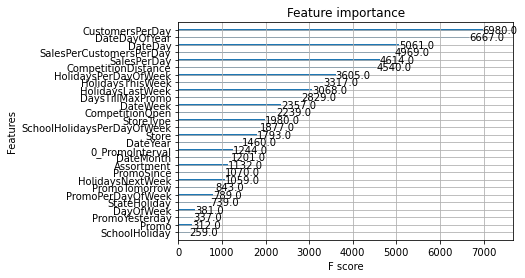

In [13]:
#Print Feature Importance
plt.figure(figsize=(18,8))
plot_importance(model)
plt.show()

In [14]:
# ============================================================ Predict
submit = df.loc[df['is_train'] == 0]
dsubmit = xgb.DMatrix(submit[features_x])
predictions = model.predict(dsubmit)


In [15]:
# ============================================================ Result before Tuning
df_predictions = submit['Id'].reset_index()
df_predictions['Id'] = df_predictions['Id'].astype('int')
df_predictions['Sales'] = (np.exp(predictions) - 1) * 0.985 #Scale Back

df_predictions.sort_values('Id', inplace=True)
df_predictions[['Id', 'Sales']].to_csv('solutionBeforeTuning.csv', index=False)

In [35]:

# ============================================================ param tuning
popSize = 10
eliteSize=0.1
paramList=['depth',
           'nRound',
           'eta',
           'subsample',
           'colsample_bytree'
          ]
#Creating an initial population
population=pd.DataFrame(np.zeros(shape=(popSize,len(paramList))),columns = paramList);

population.depth=[randint(6,15) for p in range(0,popSize)]
population.nRound=[randint(50,500) for p in range(0,popSize)]  #number of boosting round
population.eta=[random.uniform(0.6, 1) for p in range(0,popSize)]
population.subsample=[random.uniform(0.7, 1) for p in range(0,popSize)]
population.colsample_bytree=[random.uniform(0.6,1) for p in range (0,popSize)]

population

,depth,nRound,eta,subsample,colsample_bytree
0,7,385,0.976790,0.831224,0.638257
1,6,203,0.702034,0.923099,0.728370
2,6,352,0.714347,0.726226,0.809982
3,7,464,0.930505,0.742078,0.817917
4,8,194,0.911776,0.810887,0.862119
5,10,353,0.971474,0.700350,0.959517
6,9,81,0.999071,0.792783,0.752748
7,15,122,0.820821,0.819475,0.908063
8,11,160,0.736402,0.827932,0.911798
9,7,194,0.632481,0.833344,0.745009


In [36]:
def testInstance(population,i,dtrain):
    params = {"objective": "reg:squarederror",
              "max_depth": population.depth[i],
              "eta": population.eta[i],
              "subsample": population.subsample[i],
              "colsample_bytree": population.colsample_bytree[i],
          } 
    history = xgb.cv(
        params,
        dtrain,  
        #early_stopping_rounds=30, #no early stopping in Python yet!!!
        num_boost_round  =int(population.nRound[i]),
        nfold=5, # number of CV folds
        #nthread=12, # number of CPU threads  
        show_progress=False,
        feval=rmspe_xg, # custom evaluation metric
        obj=RMSPE_objective
        #maximize=0 # the lower the evaluation score the better
        )
    return history["test-rmspe-mean"].iget(-1)

In [37]:
def RMSPE_objective(predts, dtrain):
  #labels =np.expm1(dtrain.get_label())
  #predts =np.expm1(predts)
    labels =dtrain.get_label()
    grad =  -1/labels+predts/(labels**2)
    grad[labels==0]=0
    hess = 1/(labels**2)
    hess[labels==0]=0
    return grad, hess 

In [38]:
def printResult(filename,population,i,generation): #print best instances to file
    f1=open(filename, 'a')
    f1.write('"eta":%f\n'%population.eta[i])    
    f1.write('"max_depth":%f\n'%population.depth[i])    
    f1.write('"subsample":%f\n'%population.subsample[i])    
    f1.write('"colsample_bytree":%f\n'%population.colsample_bytree[i])     
    f1.write('"num_boost_round":%f\n'%population.nRound[i])  
    f1.close()

    
    

In [39]:
i=0 #selecting the best instance
params = {"objective": "reg:squarederror",
          "eta": population.eta[i],
          "max_depth": population.depth[i],
          "subsample": population.subsample[i],
          "colsample_bytree": population.colsample_bytree[i],          
} 
params


{'objective': 'reg:squarederror',
 'eta': 0.9767901529777676,
 'max_depth': 7,
 'subsample': 0.8312239941162375,
 'colsample_bytree': 0.6382570196327914}

In [40]:
population.nRound[i]

385

In [42]:
## ============================================================ train the final xgboost model
model=xgb.train(params, dtrain,  
              feval=rmspe_xg, 
              num_boost_round=int(population.nRound[i]), 
              obj=RMSPE_objective, 
              verbose_eval=True)

<Figure size 1296x576 with 0 Axes>

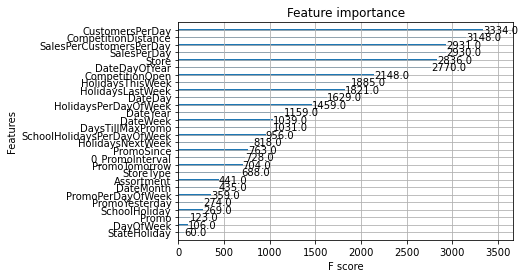

In [45]:
plt.figure(figsize=(18,8))
plot_importance(model)
plt.show()

In [46]:
# ============================================================ Predict with new model
submit = df.loc[df['is_train'] == 0]
dsubmit = xgb.DMatrix(submit[features_x])
predictions = model.predict(dsubmit)
# ============================================================ Result After Tuning
df_predictions = submit['Id'].reset_index()
df_predictions['Id'] = df_predictions['Id'].astype('int')
df_predictions['Sales'] = (np.exp(predictions) - 1) * 0.985 #Scale Back

df_predictions.sort_values('Id', inplace=True)
df_predictions[['Id', 'Sales']].to_csv('solutionAfterTuning.csv', index=False)